In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import datetime

In [7]:
path = '/content/drive/MyDrive/CE784A/course_project/'

In [8]:
# constants
# DELAY = "Delay (V_t=45) (Veh-Hours)"
PABS = "Postmile (Abs)"
PCA = "Postmile (Abs)"
NLP = "# Lane Points"
OBSV = "% Observed"
AS = "AggSpeed"
NI = "# Incidents"

In [9]:
def importDataframe(excel):
  return pd.read_excel("{}{}.xlsx".format(path,excel))


In [355]:
df_tiy = importDataframe("total_incidents_in_year")
df_tiy

,Time,# Incidents
0,2021-01-01,1279
1,2021-02-01,1172
2,2021-03-01,1632
3,2021-04-01,1611
4,2021-05-01,1594
5,2021-06-01,1724
6,2021-07-01,1674
7,2021-08-01,1541
8,2021-09-01,1622
9,2021-10-01,1540


In [356]:
x = df_tiy.Time
y = df_tiy[NI]

In [357]:
time = []
for i in range(len(x)):
  time.append(x[i])
time

[Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00')]

In [358]:
xtick = [i.strftime("%B")for i in time]
xtick

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

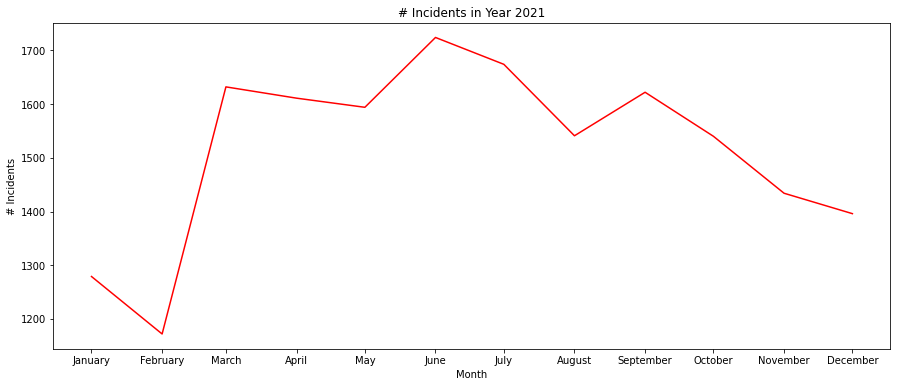

In [359]:
fig = plt.figure(figsize = (15, 6))
plt.plot(x,y,color='r')
plt.ylabel(NI)
plt.xlabel("Month")
plt.title("# Incidents in Year 2021")
plt.xticks(time,xtick)
plt.show()

In [319]:
df_tim = importDataframe("total_incidents_in_month")
df_tim

,Time,# Incidents
0,2021-02-01,43
1,2021-02-02,42
2,2021-02-03,48
3,2021-02-04,37
4,2021-02-05,53
5,2021-02-06,51
6,2021-02-07,23
7,2021-02-08,40
8,2021-02-09,50
9,2021-02-10,41


In [361]:
x = df_tim.Time
y = df_tim[NI]

In [362]:
time = []
for i in range(len(x)):
  if(i == 0 or i%4 == 0):
    time.append(x[i])
time

[Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-02-05 00:00:00'),
 Timestamp('2021-02-09 00:00:00'),
 Timestamp('2021-02-13 00:00:00'),
 Timestamp('2021-02-17 00:00:00'),
 Timestamp('2021-02-21 00:00:00'),
 Timestamp('2021-02-25 00:00:00')]

In [363]:
xtick = [i.strftime("%d/%m")for i in time]
xtick

['01/02', '05/02', '09/02', '13/02', '17/02', '21/02', '25/02']

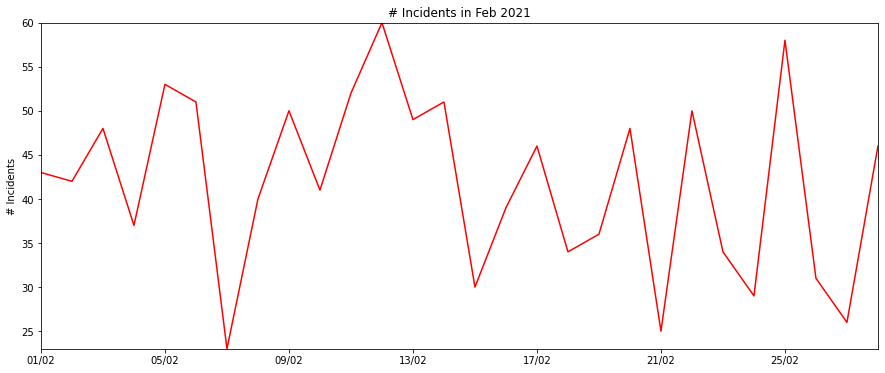

In [366]:
fig = plt.figure(figsize = (15, 6))
plt.plot(x,y,color='r')
plt.ylabel(NI)
plt.title("# Incidents in Feb 2021")
plt.axis([min(x),max(x), min(y), max(y)])
plt.xticks(time,xtick)
plt.show()

In [5]:
def xyz(excel,f=0.001):
    df_temp = pd.read_excel("{}{}.xlsx".format(path,excel))
    # df_sp
    y = df_temp[PABS]
    time = list(df_temp.columns[4:])
    z = df_temp.loc[:, time]
    pabs = z.to_numpy()
    clev = np.arange(pabs.min(), pabs.max(),f)
    return time,y,pabs,clev
    

In [417]:
x,y,z,clev = xyz('occup')
print(len(x), y.shape, z.shape,clev.shape)

288 (250,) (250, 288) (358,)


In [418]:
values = np.array([i[0]+i[1] for i in x])
values = np.unique(values)
values

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype='<U2')

In [419]:
keys = np.array([i+":00" for i in values])
keys

array(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'], dtype='<U5')

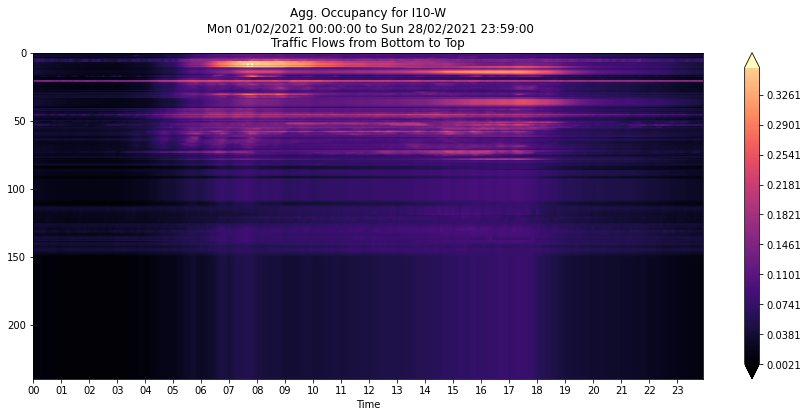

In [420]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='magma',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Occupancy for I10-W\n Mon 01/02/2021 00:00:00 to Sun 28/02/2021 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
plt.clim(0,0.4)

In [423]:
x,y,z,clev = xyz('speed',f=0.1)
print(len(x), y.shape, z.shape,clev.shape)

288 (250,) (250, 288) (561,)


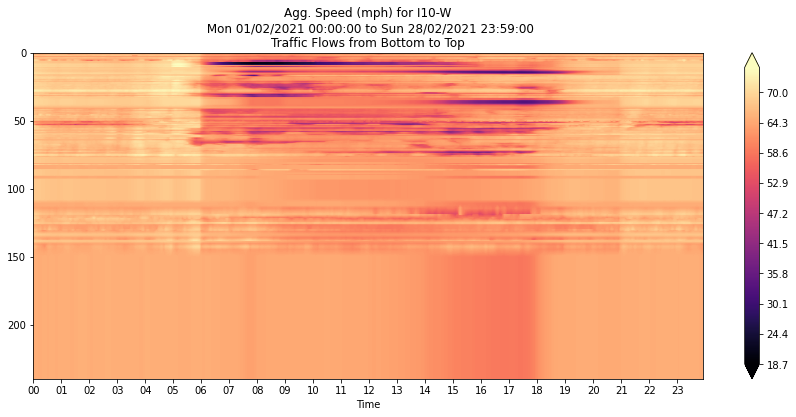

In [424]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='magma',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Speed (mph) for I10-W\n Mon 01/02/2021 00:00:00 to Sun 28/02/2021 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
# plt.clim(10, 80)

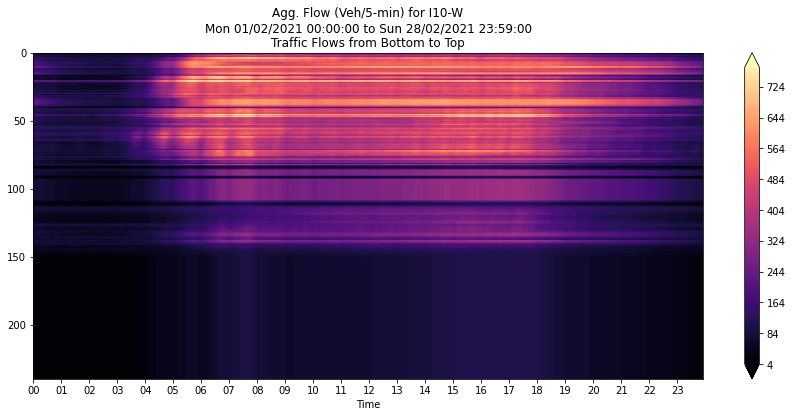

In [425]:
x,y,z,clev = xyz('flow',f=10)
# print(clev)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='magma',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Flow (Veh/5-min) for I10-W\nMon 01/02/2021 00:00:00 to Sun 28/02/2021 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
plt.clim(0, 800)

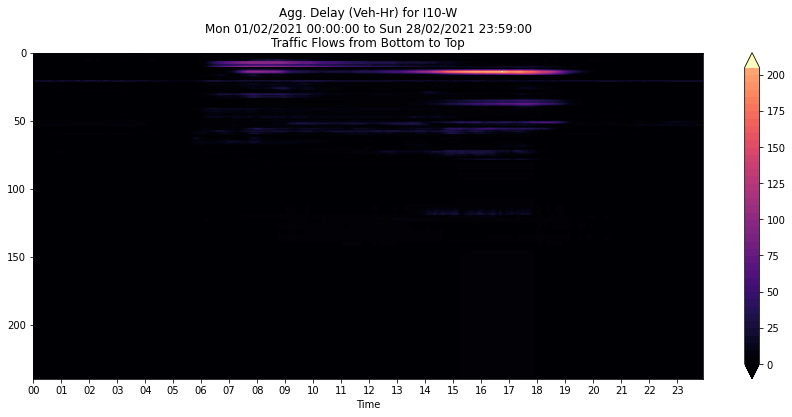

In [426]:
x,y,z,clev = xyz('delay',f=5)
# print(clev)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='magma',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Delay (Veh-Hr) for I10-W\nMon 01/02/2021 00:00:00 to Sun 28/02/2021 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
plt.clim(0, 250)

SCATTER PLOTS

In [17]:
df_q = importDataframe('Q_Data')
df_q

,Hour,Q (VMT/VHT) (mph),# Lane Points,% Observed
0,2021-02-01 00:00:00,66.2,12444,49.5
1,2021-02-01 01:00:00,65.3,12444,49.7
2,2021-02-01 02:00:00,65.0,12444,49.7
3,2021-02-01 03:00:00,66.1,12444,49.5
4,2021-02-01 04:00:00,67.5,12444,49.6
...,...,...,...,...
667,2021-02-28 19:00:00,62.6,12444,48.0
668,2021-02-28 20:00:00,62.9,12444,48.0
669,2021-02-28 21:00:00,66.0,12444,48.0
670,2021-02-28 22:00:00,66.3,12444,48.0


In [18]:
Q = "Q (VMT/VHT) (mph)"
NLP = "# Lane Points"

In [394]:
x = df_q.Hour
y = df_q[Q]
print(x.shape,y.shape)

(672,) (672,)


In [430]:
time = []
for i in x:
  if(i.strftime("%H:%M")=="00:00" and (i.day == 1 or i.day%5==0 or i.day == 28)):
    time.append(i)
time

[Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-02-05 00:00:00'),
 Timestamp('2021-02-10 00:00:00'),
 Timestamp('2021-02-15 00:00:00'),
 Timestamp('2021-02-20 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2021-02-28 00:00:00')]

In [431]:
xtick = [i.strftime("%d/%m\n%H:%M")for i in time]
xtick

['01/02\n00:00',
 '05/02\n00:00',
 '10/02\n00:00',
 '15/02\n00:00',
 '20/02\n00:00',
 '25/02\n00:00',
 '28/02\n00:00']

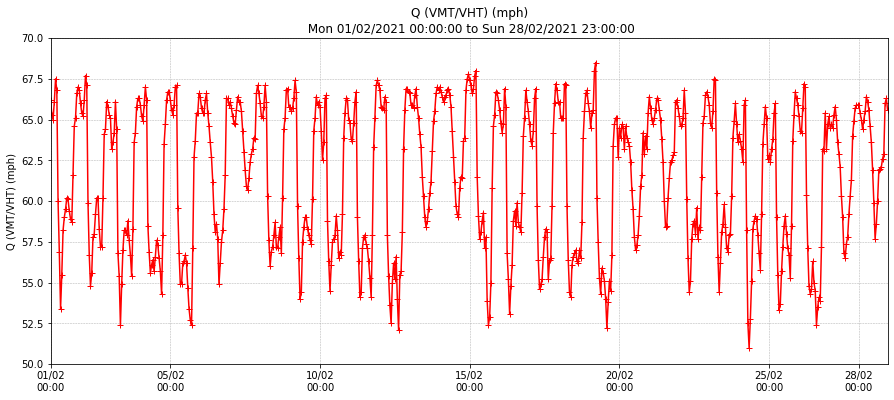

In [23]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(x,y, marker='+',color='r')
plt.ylabel("Q (VMT/VHT) (mph)")
plt.title("Q (VMT/VHT) (mph)\n Mon 01/02/2021 00:00:00 to Sun 28/02/2021 23:00:00")
plt.xticks(time,xtick)
plt.axis([time[0],x[len(x)-1], 50, 70])

plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

Travel Time Index

In [24]:
df_tt = importDataframe("travel_time_index")
df_tt

,Hour,TTI,# Lane Points,% Observed
0,2021-02-01 00:00:00,0.9,12444,49.5
1,2021-02-01 01:00:00,0.9,12444,49.7
2,2021-02-01 02:00:00,0.9,12444,49.7
3,2021-02-01 03:00:00,0.9,12444,49.5
4,2021-02-01 04:00:00,0.9,12444,49.6
...,...,...,...,...
667,2021-02-28 19:00:00,1.0,12444,48.0
668,2021-02-28 20:00:00,1.0,12444,48.0
669,2021-02-28 21:00:00,0.9,12444,48.0
670,2021-02-28 22:00:00,0.9,12444,48.0


In [432]:
x = df_tt.Hour
y = df_tt.TTI
y.shape

(672,)

In [436]:
df_tt.loc[df_tt.TTI == y.max()]

,Hour,TTI,# Lane Points,% Observed
56,2021-02-03 08:00:00,1.2,12444,50.2
279,2021-02-12 15:00:00,1.2,12444,49.3
446,2021-02-19 14:00:00,1.2,12444,49.5
560,2021-02-24 08:00:00,1.2,12444,48.0
614,2021-02-26 14:00:00,1.2,12444,48.1


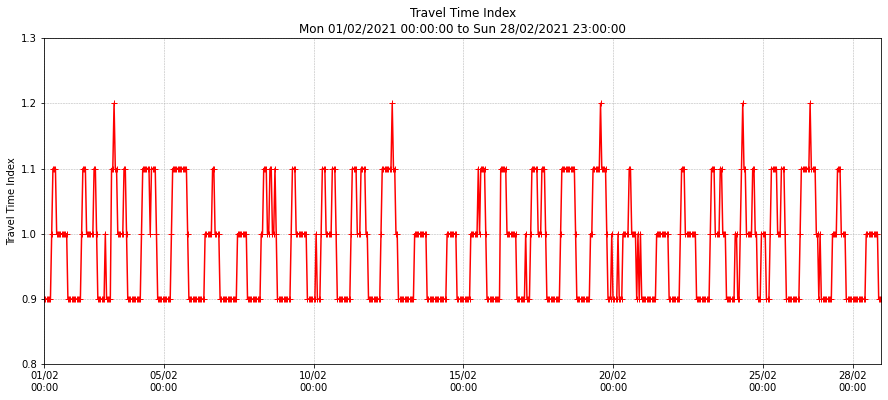

In [434]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(x,y, marker='+',color='r')
plt.ylabel("Travel Time Index")
plt.title("Travel Time Index\nMon 01/02/2021 00:00:00 to Sun 28/02/2021 23:00:00")
plt.xticks(time,xtick)
plt.axis([time[0],x[len(x)-1], 0.8, 1.3])
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

INCIDENT PER POSTMILE

In [164]:
df_ipp = importDataframe("Incident_per_postmile")
df_ipp

,Postmile bin,# Incidents
0,0,11
1,1,21
2,2,30
3,3,28
4,4,33
...,...,...
235,235,0
236,236,1
237,237,1
238,238,2


In [28]:
PB = "Postmile bin"

In [160]:
x = df_ipp[PB]
y = df_ipp[NI]

In [162]:
df_ipp.loc[df_ipp[NI] == y.max()]

,Postmile bin,# Incidents
11,11,70
12,12,70


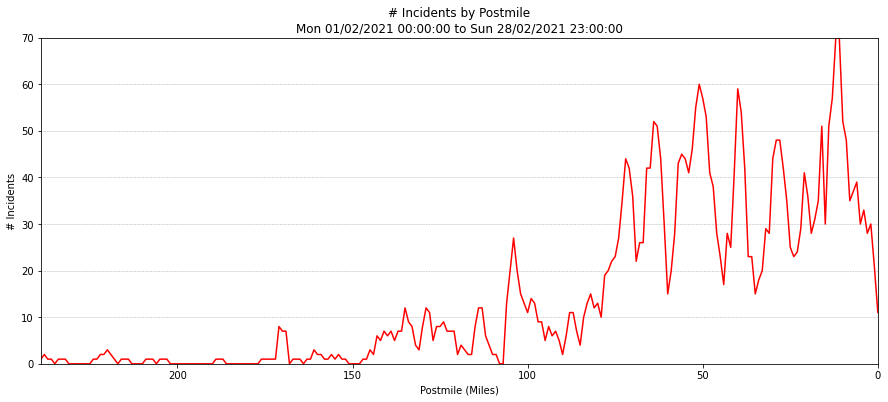

In [31]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(x,y,color='r')
plt.ylabel(NI)
plt.xlabel("Postmile (Miles)")
plt.title("# Incidents by Postmile\nMon 01/02/2021 00:00:00 to Sun 28/02/2021 23:00:00")
plt.axis([x.max(), x.min(), y.min(),y.max()])
plt.grid(linestyle = '--', linewidth = 0.5,axis='y')
plt.show()

12 FEB

In [173]:
def convertToHourVsPS(excel):
    df_ = importDataframe(excel)
    pabs = df_[PABS].loc[:249]
    t_dict = {
      PABS: list(pabs)
    }
    for i in range(len(df_)):
      if(t_dict.get(df_.Time[i],-1) == -1):
        t_dict[df_.Time[i]] = [df_.iloc[i,4]]
      else: 
        t_dict[df_.Time[i]].append(df_.iloc[i,4])
    df_temp = pd.DataFrame(t_dict,columns=list(t_dict.keys()))
    return df_temp

In [438]:
df_occ = convertToHourVsPS("12feb_occ")
df_flow = convertToHourVsPS("12feb_flow")
df_speed = convertToHourVsPS("12feb_speed")

In [439]:
x = df_occ.loc[df_occ[PABS] == 12.345]
y = df_flow.loc[df_flow[PABS] == 12.345]

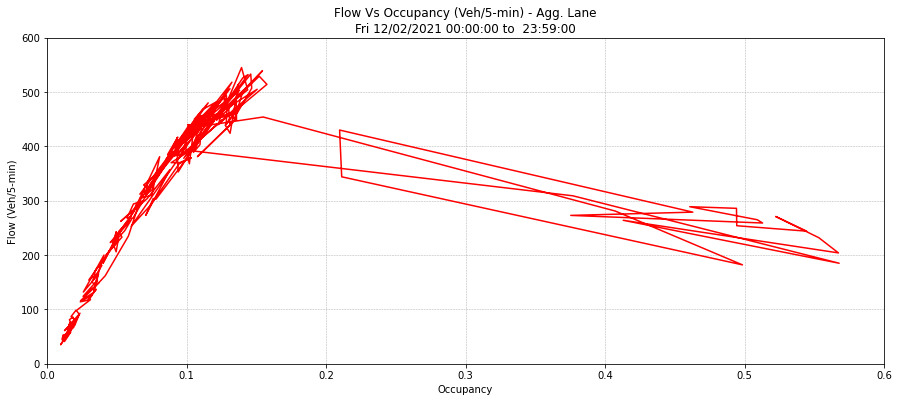

In [440]:
r = 54
x = list(df_occ.iloc[r,1:])
y = list(df_flow.iloc[r,1:])
fig = plt.figure(figsize = (15, 6))
plt.plot(x,y,color='r')
plt.xlabel("Occupancy")
plt.ylabel("Flow (Veh/5-min)")
plt.title("Flow Vs Occupancy (Veh/5-min) - Agg. Lane\nFri 12/02/2021 00:00:00 to  23:59:00")
plt.axis([0, 0.6, 0,600])
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

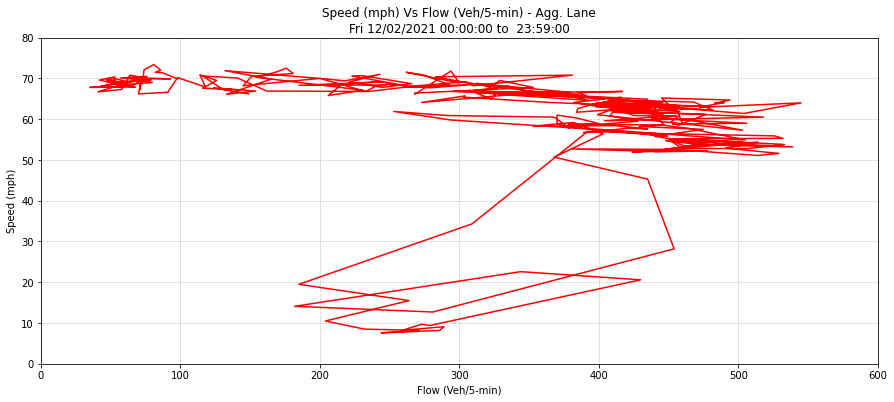

In [401]:
# r = 54
#22 40 54
y = list(df_speed.iloc[r,1:])
x = list(df_flow.iloc[r,1:])
fig = plt.figure(figsize = (15, 6))
plt.plot(x,y,color='r')

plt.ylabel("Speed (mph)")
plt.xlabel("Flow (Veh/5-min)")
plt.title("Speed (mph) Vs Flow (Veh/5-min) - Agg. Lane\nFri 12/02/2021 00:00:00 to  23:59:00")
plt.axis([0, 600, 0, 80])
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [12]:
def xyz_for_day(excel,f=0.001):
    df_temp = convertToHourVsPS(excel)
    y = df_temp[PABS]
    time = list(df_temp.columns[1:])
    z = df_temp.loc[:, time]
    pabs = z.to_numpy()
    clev = np.arange(pabs.min(), pabs.max(),f)
    return time,y,pabs,clev
    

In [402]:
x,y,z,clev = xyz_for_day("12feb_occ")
print(len(x), y.shape, z.shape,clev.shape)

288 (250,) (250, 288) (568,)


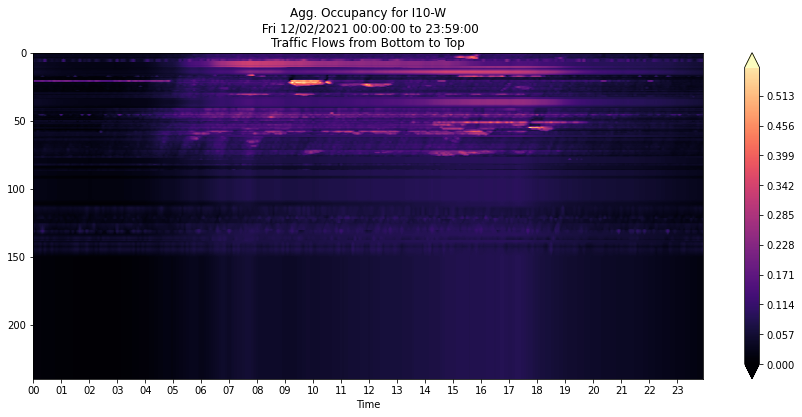

In [403]:
# print(clev)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='magma',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Occupancy for I10-W\n Fri 12/02/2021 00:00:00 to 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
plt.clim(0, 0.6)

In [404]:
x,y,z,clev = xyz_for_day("12feb_flow",f=1)

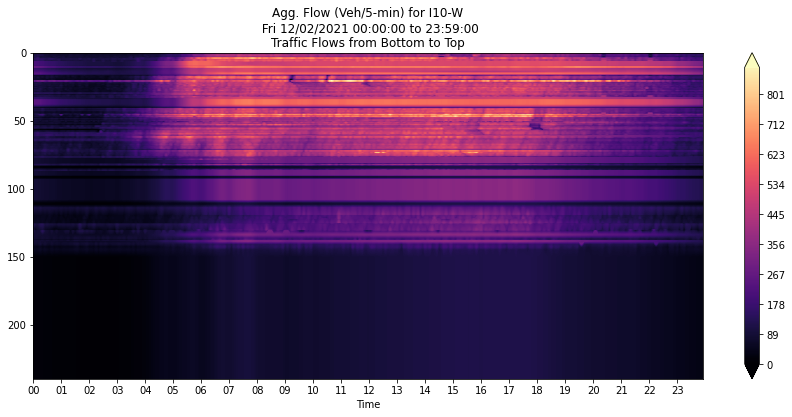

In [405]:
# print(clev)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='magma',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Flow (Veh/5-min) for I10-W\n Fri 12/02/2021 00:00:00 to 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
plt.clim(0, 900)

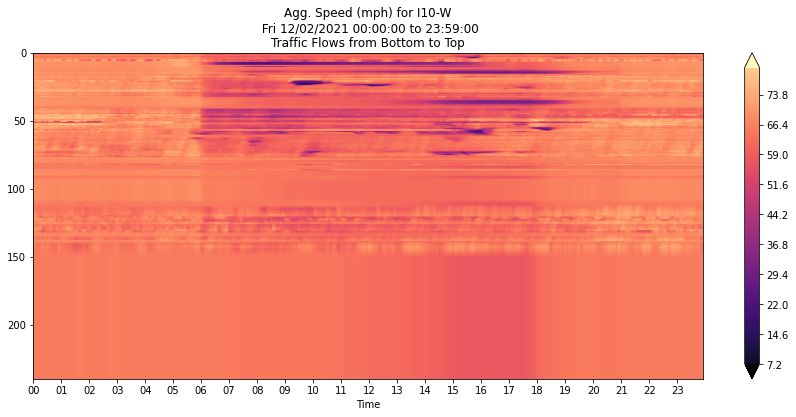

In [406]:
x,y,z,clev = xyz_for_day("12feb_speed",f=0.1)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='magma',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Speed (mph) for I10-W\n Fri 12/02/2021 00:00:00 to 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
plt.clim(0, 90)

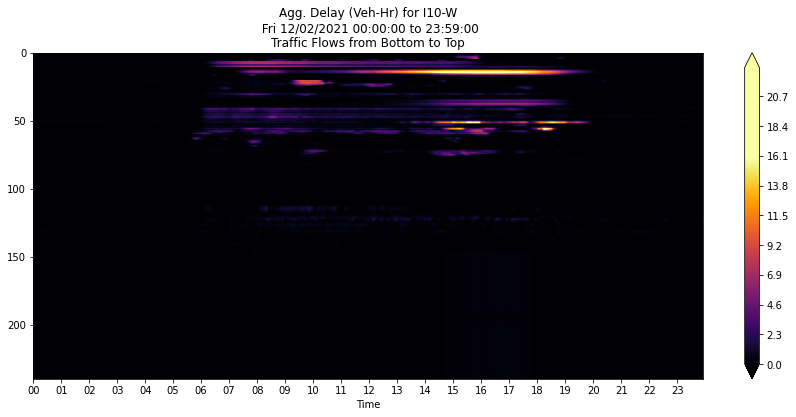

In [407]:
x,y,z,clev = xyz_for_day("12feb_delay",f=0.01)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.contourf(x,y, z,clev, cmap='inferno',extend='both')
plt.axis([min(x), max(x), 0,y.max()])
plt.gca().invert_yaxis()
plt.xticks(keys,values)
plt.xlabel("Time")
plt.title("Agg. Delay (Veh-Hr) for I10-W\n Fri 12/02/2021 00:00:00 to 23:59:00\nTraffic Flows from Bottom to Top")
plt.colorbar()
plt.clim(0, 16)

VHT VMT Travel Time

In [13]:
def xy_for_day(excel):
  df_temp = importDataframe(excel)
  x = df_temp.Hour
  y = df_temp.iloc[:,1]
  column = df_temp.columns[1]
  time = []
  for i in x:
    if(i.hour%2==0):
      time.append(i)
  xtick = [i.strftime("%H:%M")for i in time]
  return x,y,column,time,xtick

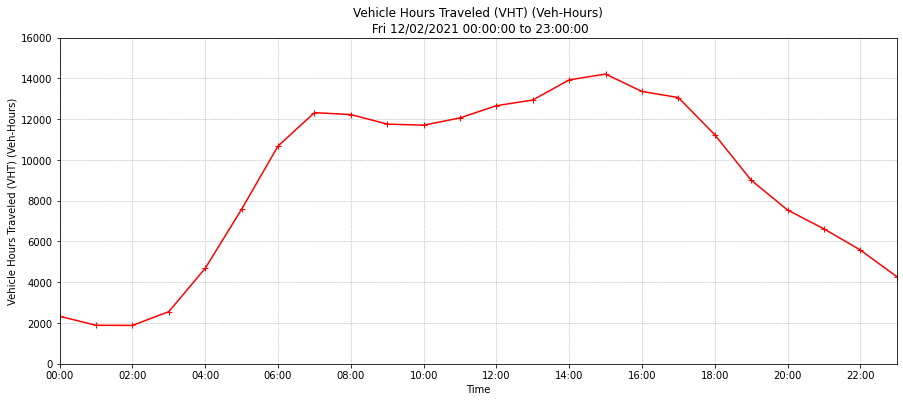

In [437]:
x,y,column,time,xtick = xy_for_day("12feb_vht")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(x,y, marker='+',color='r')
column = 'Vehicle Hours Traveled (VHT) (Veh-Hours)'
plt.ylabel(column)
plt.title(column + "\n Fri 12/02/2021 00:00:00 to 23:00:00")
plt.xticks(time,xtick)
plt.xlabel('Time')
plt.axis([time[0],x[len(x)-1], 0, 16000])
  
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

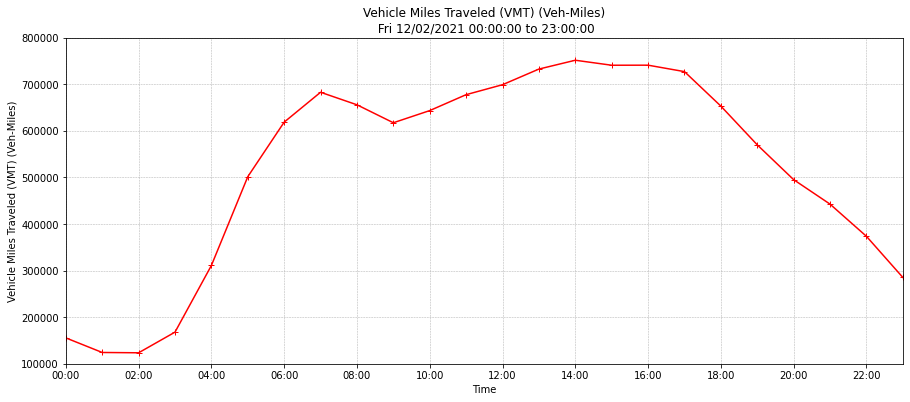

In [346]:
x,y,column,time,xtick = xy_for_day("12feb_vmt")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(x,y, marker='+',color='r')
column = 'Vehicle Miles Traveled (VMT) (Veh-Miles)'
plt.ylabel(column)
plt.title(column + "\n Fri 12/02/2021 00:00:00 to 23:00:00")
plt.xticks(time,xtick)
plt.xlabel('Time')
plt.axis([time[0],x[len(x)-1], 100000, 800000])

plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

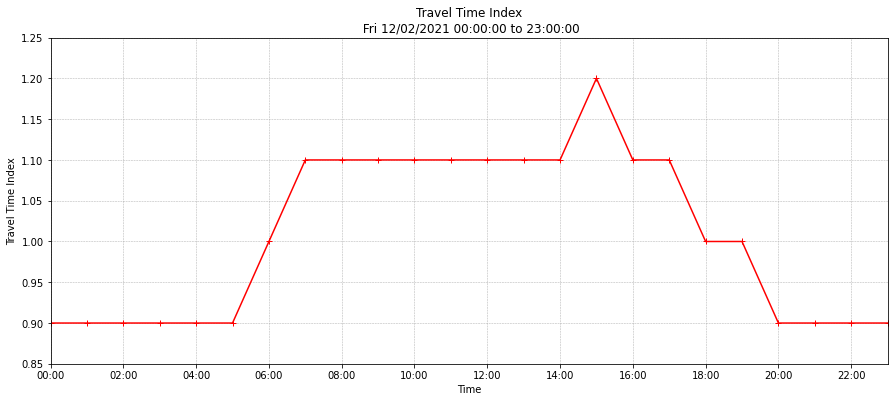

In [347]:
x,y,column,time,xtick = xy_for_day("12feb_traveltime")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(x,y, marker='+',color='r')
column = "Travel Time Index"
plt.ylabel(column)
plt.title(column + "\n Fri 12/02/2021 00:00:00 to 23:00:00")
plt.xticks(time,xtick)
plt.xlabel('Time')
plt.axis([time[0],x[len(x)-1], 0.85, 1.25])

plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

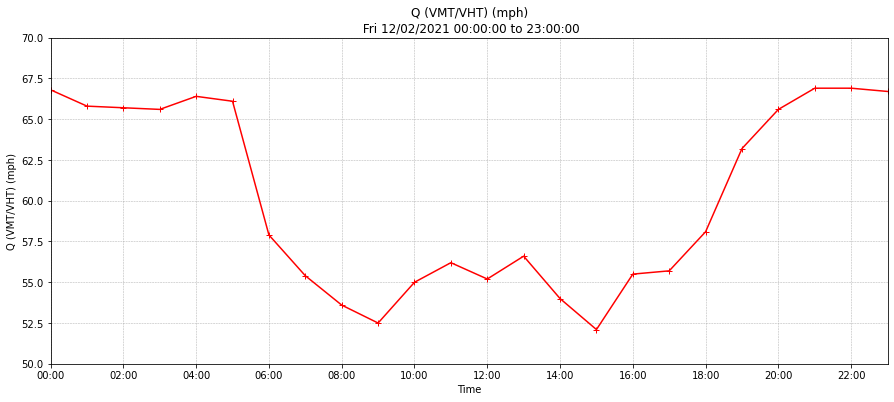

In [348]:
x,y,column,time,xtick = xy_for_day("12feb_Q")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(x,y, marker='+',color='r')
plt.ylabel(column)
plt.title(column + "\n Fri 12/02/2021 00:00:00 to 23:00:00")
plt.xticks(time,xtick)
plt.xlabel('Time')
plt.axis([time[0],x[len(x)-1], 50,70])

plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [408]:
df__ = importDataframe("12feb_incident_per_postmile")
df__ 

,Postmile bin,# Incidents
0,0,1
1,1,3
2,2,4
3,3,4
4,4,3
...,...,...
235,235,0
236,236,0
237,237,0
238,238,0


In [144]:
PB = "Postmile bin"
NI

'# Incidents'

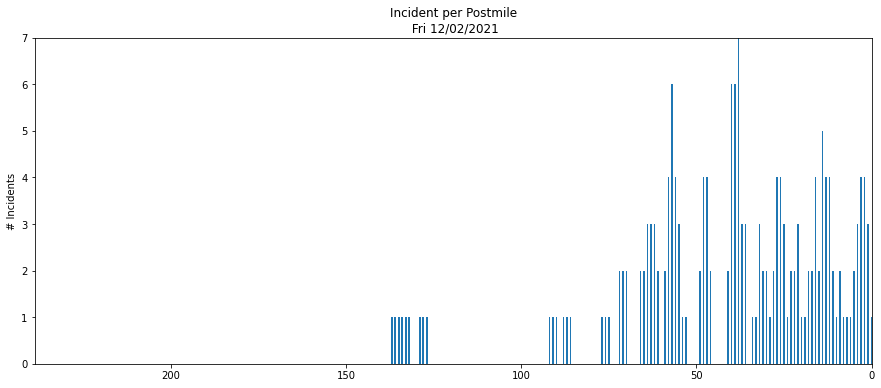

In [409]:
fig = plt.figure(figsize = (15, 6))
plt.bar(df__[PB], df__[NI],width=0.5)
plt.ylabel(NI)
plt.title("Incident per Postmile\n Fri 12/02/2021")
plt.axis([max(df__[PB]), min(df__[PB]), min(df__[NI]),max(df__[NI])])
plt.show()

INCIDENT DURATION VS TIME

In [416]:
df_incd = importDataframe("12feb_incident")
df_incd.iloc[:14]

,Incident Id,Start Time,Duration (mins),Freeway,CA PM,Abs PM,Source,AREA,LOCATION,DESCRIPTION
0,19988509,02-12-21 02:12,10,I10-W,R10.455,8.3,CHP,Central LA,I10 W - S La Brea Ave,FIRE-Report of Fire
1,19988621,02-12-21 05:49,58,I10-W,29.5,28.0,CHP,East LA,I10 W - Valley Blvd,1179-Trfc Collision-1141 Enrt
2,19988652,02-12-21 06:18,0,I10-W,29.439,76.2,CHP,San Bernardino,I10 W Eo - Alabama St,1125-Traffic Hazard
3,19988680,02-12-21 06:43,36,I10-W,27.7,26.2,CHP,East LA,I10 W - Temple City Blvd,1125-Traffic Hazard
4,19988688,02-12-21 06:45,19,I10-W,27.7,26.2,CHP,LAFSP,I10 W - Temple City Blvd,1125-Traffic Hazard
5,19988699,02-12-21 06:50,0,I10-W,16.228,63.0,CHP,San Bernardino,I10 W - Sierra Ave Onr,1125-Traffic Hazard
6,19988706,02-12-21 06:57,11,I10-W,29.3,27.8,CHP,LAFSP,PECK RD ONR - I10 W,1125-Traffic Hazard
7,19988736,02-12-21 07:19,12,I10-W,R18.528,65.3,CHP,San Bernardino,I10 W - Cedar Ave,1125-Traffic Hazard
8,19988737,02-12-21 07:18,0,I10-W,R18.528,65.3,CHP,San Bernardino FSP,I10 W - Cedar Ave,1125-Traffic Hazard
9,19988758,02-12-21 07:28,14,I10-W,15.828,62.6,CHP,San Bernardino FSP,Sierra Ave Onr - I10 W,1125-Traffic Hazard


In [230]:
ST = "Start Time"
DT = "Duration (mins)"

In [234]:
df_incd[ST] = pd.to_datetime(df_incd[ST])

In [ ]:
df_incd = df_incd.sort_values(ST)
df_incd

In [410]:
x = df_incd[ST]
y = df_incd[DT]

In [411]:
x_axis = []
for i in range(0,24,2):
  x_axis.append(datetime.datetime(2021,2,12,i))
x_axis

[datetime.datetime(2021, 2, 12, 0, 0),
 datetime.datetime(2021, 2, 12, 2, 0),
 datetime.datetime(2021, 2, 12, 4, 0),
 datetime.datetime(2021, 2, 12, 6, 0),
 datetime.datetime(2021, 2, 12, 8, 0),
 datetime.datetime(2021, 2, 12, 10, 0),
 datetime.datetime(2021, 2, 12, 12, 0),
 datetime.datetime(2021, 2, 12, 14, 0),
 datetime.datetime(2021, 2, 12, 16, 0),
 datetime.datetime(2021, 2, 12, 18, 0),
 datetime.datetime(2021, 2, 12, 20, 0),
 datetime.datetime(2021, 2, 12, 22, 0)]

In [412]:
time = []
for i in range(len(x_axis)):
    time.append(x_axis[i])
time

[datetime.datetime(2021, 2, 12, 0, 0),
 datetime.datetime(2021, 2, 12, 2, 0),
 datetime.datetime(2021, 2, 12, 4, 0),
 datetime.datetime(2021, 2, 12, 6, 0),
 datetime.datetime(2021, 2, 12, 8, 0),
 datetime.datetime(2021, 2, 12, 10, 0),
 datetime.datetime(2021, 2, 12, 12, 0),
 datetime.datetime(2021, 2, 12, 14, 0),
 datetime.datetime(2021, 2, 12, 16, 0),
 datetime.datetime(2021, 2, 12, 18, 0),
 datetime.datetime(2021, 2, 12, 20, 0),
 datetime.datetime(2021, 2, 12, 22, 0)]

In [413]:
xtick = [i.strftime("%H:%M")for i in time]
xtick

['00:00',
 '02:00',
 '04:00',
 '06:00',
 '08:00',
 '10:00',
 '12:00',
 '14:00',
 '16:00',
 '18:00',
 '20:00',
 '22:00']

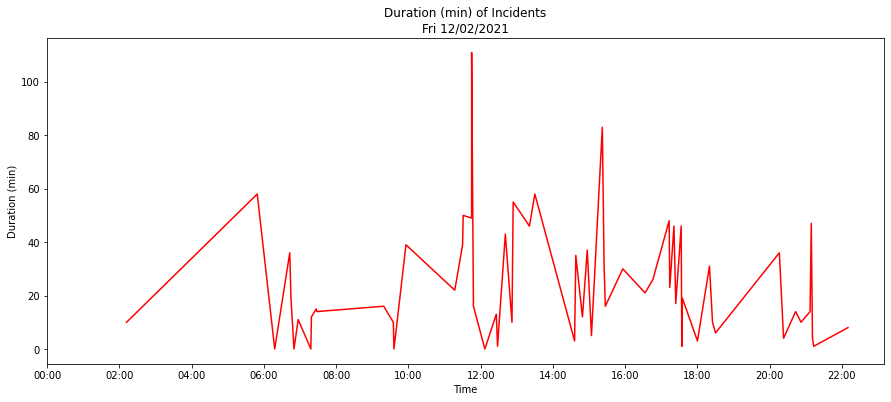

In [414]:
fig = plt.figure(figsize = (15, 6))
plt.plot(x,y,color='r')
plt.ylabel("Duration (min)")
plt.xlabel("Time")
plt.title("Duration (min) of Incidents\nFri 12/02/2021")
plt.xticks(time,xtick)
plt.show()

BOTTLENECK

In [14]:
df_bt = importDataframe("bottlenecks_of_month")
df_bt

,VDS,Name,Type,Shift,Fwy,Abs PM,CA PM,Latitude,Longitude,# Days Active,Avg Extent (Miles),Total Delay (veh-hrs),Total Duration (mins)
0,717142.0,SANTA ANITA,ML,NOON,I10-W,27.060,28.56,34.069271,-118.044184,2.0,1.60000,143.9,25.0
1,813068.0,ETIWANDA AVE LOOP,ML,PM,I10-W,57.925,11.16,34.067757,-117.523472,16.0,0.29375,88.6,230.0
2,717015.0,LA CIENEGA,ML,AM,I10-W,6.575,R8.73,34.036959,-118.379466,20.0,2.80000,27837.6,3760.0
3,806576.0,VINEYARD AVE LOOP,HV,PM,I10-W,52.887,6.122,34.070549,-117.610690,5.0,0.10000,14.4,325.0
4,806606.0,HAVEN AVE,HV,PM,I10-W,54.843,8.078,34.067681,-117.577307,5.0,0.44000,95.1,370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,801279.0,HAVEN AVE,ML,NOON,I10-W,54.843,8.078,34.067681,-117.577307,2.0,1.10000,301.5,165.0
227,717012.0,CATTARAUGUS,ML,AM,I10-W,6.205,R8.36,34.034476,-118.385030,1.0,3.30000,35.1,5.0
228,818550.0,MULBERRY CREEK,ML,AM,I10-W,58.872,12.1,34.066043,-117.507141,1.0,1.00000,69.3,35.0
229,801230.0,MONTE VISTA AVE,ML,PM,I10-W,47.356,.591,34.082004,-117.699964,1.0,1.50000,39.9,15.0


In [15]:
APM = "Abs PM"
TDY = "Total Delay (veh-hrs)"
TDT = "Total Duration (mins)"

In [16]:
len(df_bt[APM].unique())

106

In [18]:
x = df_bt[APM]
y1 = df_bt[TDY]
y2 = df_bt[TDT]

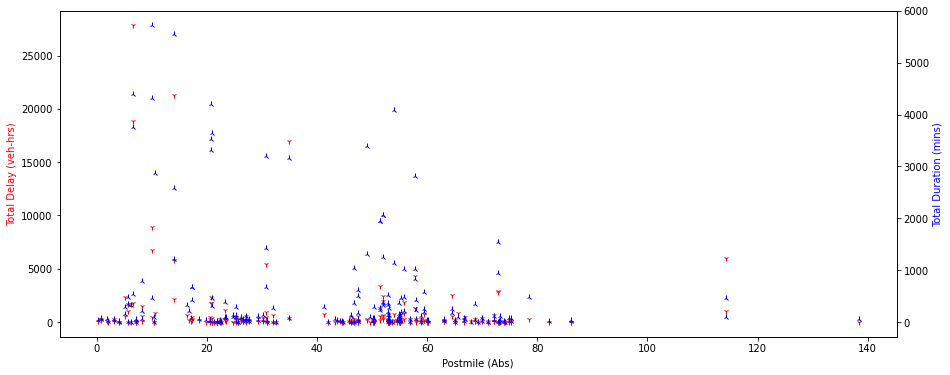

In [32]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
ax1.plot(x, y1, '1', color='r')
ax2.plot(x, y2, '2', color='b')

ax1.set_xlabel(PABS)
ax1.set_ylabel(TDY, color='r')
ax2.set_ylabel(TDT,  color='b')
ax1.title("Bottlenecks ")
plt.show()